In [1]:
# Import packages
import os 
import tensorflow as tf
import skimage.io as skimg
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

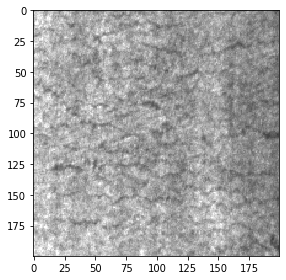

(200, 200, 3)
8 (200, 200) JPEG


In [2]:
#import skimage.io as io

crazing_img = skimg.imread('/Users/jakechiu/Desktop/NEU-DET/image/crazing_1.jpg')
skimg.imshow(crazing_img)
plt.show()

print(crazing_img.shape)

rolled = Image.open('/Users/jakechiu/Desktop/NEU-DET/image/rolled-in_scale_200.jpg')
print(rolled.bits, rolled.size, rolled.format)

In [3]:
path = '/Users/jakechiu/Desktop/NEU-DET/image/'
# Find out the name of each picture in IMAGES file
img_name = os.listdir(path)
img_name

['scratches_225.jpg',
 'scratches_231.jpg',
 'scratches_219.jpg',
 'patches_162.jpg',
 'pitted_surface_13.jpg',
 'patches_176.jpg',
 'patches_189.jpg',
 'crazing_49.jpg',
 'crazing_8.jpg',
 'patches_22.jpg',
 'crazing_61.jpg',
 'crazing_75.jpg',
 'patches_36.jpg',
 'pitted_surface_228.jpg',
 'inclusion_58.jpg',
 'rolled-in_scale_239.jpg',
 'crazing_219.jpg',
 'pitted_surface_214.jpg',
 'crazing_231.jpg',
 'rolled-in_scale_205.jpg',
 'inclusion_197.jpg',
 'inclusion_64.jpg',
 'inclusion_183.jpg',
 'inclusion_70.jpg',
 'crazing_225.jpg',
 'rolled-in_scale_211.jpg',
 'pitted_surface_200.jpg',
 'inclusion_168.jpg',
 'rolled-in_scale_18.jpg',
 'rolled-in_scale_30.jpg',
 'inclusion_154.jpg',
 'inclusion_140.jpg',
 'rolled-in_scale_24.jpg',
 'patches_228.jpg',
 'scratches_153.jpg',
 'scratches_147.jpg',
 'patches_214.jpg',
 'patches_200.jpg',
 'scratches_190.jpg',
 'scratches_39.jpg',
 'scratches_184.jpg',
 'scratches_11.jpg',
 'crazing_147.jpg',
 'rolled-in_scale_173.jpg',
 'pitted_surface_1

In [4]:
from xml.etree import ElementTree as ET
xml_path = '/Users/jakechiu/Desktop/NEU-DET/ANNOTATIONS/'
xml_name = os.listdir(xml_path) 
xml_list = []
for name in xml_name:
    b = []
    tree = ET.parse(xml_path + name)
    root = tree.getroot()
    n = root.find('filename').text
    if n.endswith('.jpg') == False:
        n = n + '.jpg'

    for size in root.findall('size'):
        w = int(size.find('width').text)
        h = int(size.find('height').text)
        d = int(size.find('depth').text)
    for ob in root.findall('object'):
        na = ob.find('name').text
        for bd in ob.findall('bndbox'):
            xmin = bd.find('xmin').text
            ymin = bd.find('ymin').text
            xmax = bd.find('xmax').text
            ymax = bd.find('ymax').text
        bndbox = (int(xmin), int(ymin), int(xmax), int(ymax))
        
        b.append([na,bndbox])
    xml_list.append([n, w, h, d, b])
    #xml_list.append({'name': n, 'width': w, 'height': h, 'depth': d, 'bndbox':b})

In [5]:
#Print first five objects
xml_list[:5]


[['crazing_61.jpg',
  200,
  200,
  1,
  [['crazing', (74, 103, 198, 166)], ['crazing', (28, 30, 179, 95)]]],
 ['patches_22.jpg',
  200,
  200,
  1,
  [['patches', (10, 148, 57, 200)], ['patches', (109, 1, 179, 200)]]],
 ['patches_36.jpg',
  200,
  200,
  1,
  [['patches', (16, 101, 70, 135)], ['patches', (109, 5, 164, 199)]]],
 ['crazing_75.jpg',
  200,
  200,
  1,
  [['crazing', (4, 54, 147, 161)], ['crazing', (158, 24, 200, 173)]]],
 ['crazing_8.jpg',
  200,
  200,
  1,
  [['crazing', (1, 26, 179, 118)], ['crazing', (1, 121, 176, 200)]]]]

In [6]:
for i in xml_list:
    ty = []
    for defect in i[4]:
        de = defect[0]
        if de not in ty:
            ty.append(de)
    #print ('{} has {} defect(s)'.format(i[0], len(i[4])))    
    #print ('{} has {} type of defects: {}'.format(i[0], len(ty), ty))
    #print('----------------------------------')

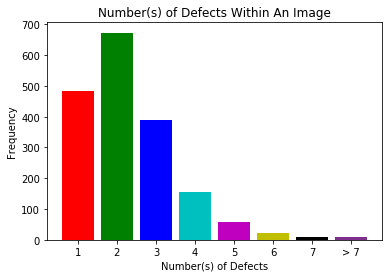

1 Defect(s) in an image: 483
2 Defect(s) in an image: 673
3 Defect(s) in an image: 390
4 Defect(s) in an image: 154
5 Defect(s) in an image: 59
6 Defect(s) in an image: 22
7 Defect(s) in an image: 9
> 7 Defect(s) in an image: 10


In [7]:
one, two, three, four, five, six, seven, more_than_seven = 0, 0, 0, 0, 0, 0, 0, 0

for i in xml_list:
    if len(i[4]) == 1:
        one += 1
    elif len(i[4]) == 2:
        two += 1
    elif len(i[4]) == 3:
        three += 1
    elif len(i[4]) == 4:
        four += 1
    elif len(i[4]) == 5:
        five += 1
    elif len(i[4]) == 6:
        six += 1
    elif len(i[4]) == 7:
        seven += 1
    else:
        more_than_seven += 1

names = ['1', '2', '3', '4', '5', '6', '7', '> 7']
values = [one, two, three, four, five, six, seven, more_than_seven]
plt.bar(names, values, color = ['r', 'g', 'b', 'c', 'm', 'y', 'k', '#7E2F8E'])
plt.title('Number(s) of Defects Within An Image')
plt.xlabel('Number(s) of Defects')
plt.ylabel('Frequency')
#for i in range(len(names)):
#    plt.text(x = r4[i]-0.5 , y = bars4[i]+0.1, s = label[i], size = 6)
plt.show()

for i in range(len(names)):
    print('{} Defect(s) in an image: {}'.format(names[i], values[i]))

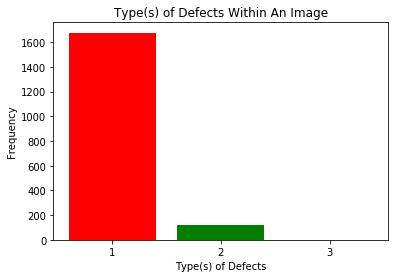

1 Type(s) of Defects in An Image: 1677
2 Type(s) of Defects in An Image: 121
3 Type(s) of Defects in An Image: 2


In [8]:
One, Two, Three = 0, 0, 0

for i in xml_list:
    ty = []
    for defect in i[4]:
        de = defect[0]
        if de not in ty:
            ty.append(de)
            
    if len(ty) == 1:
        One += 1
    elif len(ty) == 2:
        Two += 1
    elif len(ty) == 3:
        Three += 1
    else: 
        more_than_three += 1

names = ['1', '2', '3']
values = [One, Two, Three]

plt.bar(names, values, color = ['r', 'g', 'b'])
plt.title('Type(s) of Defects Within An Image')
plt.xlabel('Type(s) of Defects')
plt.ylabel('Frequency')
plt.show()

for i in range(len(names)):
    print ('{} Type(s) of Defects in An Image: {}'.format(names[i], values[i]))

In [9]:
Crazing, Inclusion, Patches, Scratches, Pitted_Surface, Rolled_In_Scale  = 0, 0, 0, 0, 0, 0
for i in xml_list:
    for defect in i[4]:
        de = defect[0]
        if de == 'crazing':
            Crazing += 1
        elif de == 'inclusion':
            Inclusion += 1
        elif de == 'patches':
            Patches += 1
        elif de == 'scratches':
            Scratches += 1
        elif de == 'pitted_surface':
            Pitted_Surface += 1
        else:
            Rolled_In_Scale += 1

Total = Crazing + Inclusion + Patches + Scratches + Pitted_Surface + Rolled_In_Scale
print('crazing:', Crazing)
print('inclusion:', Inclusion)
print('patches:', Patches)
print('scratches:', Scratches)
print('pitted_surface:', Pitted_Surface)
print('rolled_in scale:', Rolled_In_Scale)
print('Total Numbers of Defects:', Total)

crazing: 689
inclusion: 1011
patches: 881
scratches: 548
pitted_surface: 432
rolled_in scale: 628
Total Numbers of Defects: 4189


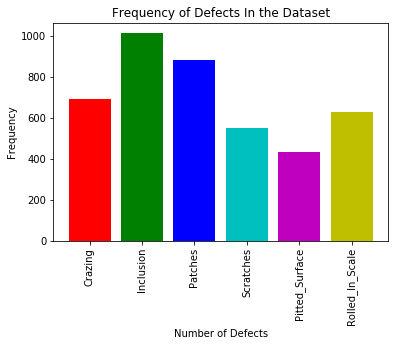

In [10]:
names = ['Crazing', 'Inclusion', 'Patches', 'Scratches', 'Pitted_Surface', 'Rolled_In_Scale']
values = [Crazing, Inclusion, Patches, Scratches, Pitted_Surface, Rolled_In_Scale]
plt.bar(names, values, color = ['r', 'g', 'b', 'c', 'm', 'y'])
plt.title('Frequency of Defects In the Dataset')
plt.xlabel('Number of Defects')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
#for i in range(len(names)):
#    plt.text(x = r4[i]-0.5 , y = bars4[i]+0.1, s = label[i], size = 6)
plt.show()

## Generate the Data

In [11]:
import sys
import io
import pandas as pd
import numpy as np
from PIL import Image
import IPython.display as display
import random
from sklearn.model_selection import train_test_split

In [12]:
def _int64_feature(value):
  return tf.train.Feature(int64_list = tf.train.Int64List(value = [value]))

def _floats_feature(value):
  return tf.train.Feature(float_list = tf.train.FloatList(value = [value]))

def _bytes_feature(value):
  return tf.train.Feature(bytes_list = tf.train.BytesList(value = [value]))

In [13]:
tfrecords = []
for name in img_name: 
    for i in xml_list:
        if name == i[0]:
            h = i[1]
            w = i[2]
            d = i[3]
            for defect in i[4]:
                xmin, ymin, xmax, ymax = defect[1][0], defect[1][1], defect[1][2], defect[1][3]
                tfrecords.append([name, h, w, d, defect[0], xmin, ymin, xmax, ymax])
tfrecords[:10]

[['scratches_225.jpg', 200, 200, 1, 'scratches', 53, 52, 70, 155],
 ['scratches_225.jpg', 200, 200, 1, 'scratches', 173, 1, 186, 86],
 ['scratches_225.jpg', 200, 200, 1, 'scratches', 162, 137, 182, 198],
 ['scratches_225.jpg', 200, 200, 1, 'scratches', 1, 3, 16, 184],
 ['scratches_225.jpg', 200, 200, 1, 'inclusion', 174, 179, 199, 200],
 ['scratches_231.jpg', 200, 200, 1, 'scratches', 13, 1, 45, 195],
 ['scratches_231.jpg', 200, 200, 1, 'scratches', 145, 3, 160, 200],
 ['scratches_231.jpg', 200, 200, 1, 'scratches', 185, 1, 194, 199],
 ['scratches_231.jpg', 200, 200, 1, 'inclusion', 12, 120, 100, 151],
 ['scratches_219.jpg', 200, 200, 1, 'scratches', 83, 4, 99, 117]]

In [14]:
random.seed(2020)
random.shuffle(tfrecords)
n = Total//4
l = [tfrecords[x:x+n] for x in range(0, len(tfrecords), n)]
tf_dict = {'tf_1':l[0], 'tf_2':l[1], 'tf_3':l[2], 'tf_4':l[3] + l[4]}

In [15]:
tf_path = '/Users/jakechiu/Desktop/NEU-DET/tfrecord_1/'

for key, values in tf_dict.items():
    file = tf_path + key + '.tfrecords'
    print("Create files: ", key + '.tfrecords')
    writer = tf.io.TFRecordWriter(file)
    for record in values:
        image_path = path + record[0]
        image = skimg.imread(image_path)
        image_raw = image.tostring()
        example = tf.train.Example(features=tf.train.Features(feature={
            'image_raw': _bytes_feature(image_raw),
            'height': _int64_feature(record[1]),
            'width': _int64_feature(record[2]),
            'depth': _int64_feature(record[3]),
            'label': _bytes_feature(record[4].encode()),
            'xmin': _floats_feature(record[5]),
            'ymin': _floats_feature(record[6]),
            'xmax': _floats_feature(record[7]),
            'ymax': _floats_feature(record[8])}))
        writer.write(example.SerializeToString())
    writer.close()
    

/Users/jakechiu/Desktop/NEU-DET/tfrecord_1/tf_1.tfrecords
/Users/jakechiu/Desktop/NEU-DET/tfrecord_1/tf_2.tfrecords
/Users/jakechiu/Desktop/NEU-DET/tfrecord_1/tf_3.tfrecords
/Users/jakechiu/Desktop/NEU-DET/tfrecord_1/tf_4.tfrecords


In [16]:
#reader = tf.TFRecordReader()
#queue = tf.train.string_input_producer('/Users/jakechiu/Desktop/NEU-DET/tfrecord/crazing_1-crazing.tfrecords')
#_, serialized = reader.read(queue)

# Create a dictionary describing the features.
#read_features = {
#    'image_raw': tf.io.FixedLenFeature([], tf.string),
#    'height': tf.io.FixedLenFeature([], tf.int64),
#    'width': tf.io.FixedLenFeature([], tf.int64),
#    'depth': tf.io.FixedLenFeature([], tf.int64),
#    'label': tf.io.FixedLenFeature([], tf.string),
#    'xmin': tf.io.FixedLenFeature([], tf.float32),
#    'ymin': tf.io.FixedLenFeature([], tf.float32),
#    'xmax': tf.io.FixedLenFeature([], tf.float32),
#    'ymax': tf.io.FixedLenFeature([], tf.float32)
#}

#features = tf.parse_single_example(serialied, read_features)
#image = features['image_raw']


In [17]:
for elem in parsed_image_dataset:
  print(elem['image_raw'])
#image = tf.io.read_file(filename)
#image = tf.image.decode_jpeg(image)
#image = tf.image.convert_image_dtype(image, tf.float32)
#image = tf.image.resize(image, [128, 128])
#image_raw = parsed_image_dataset['image_raw'].numpy()
#image = tf.image.decode_image(parsed_image_dataset['image_raw'], dtype=tf.float32) 
#display.display(display.Image(data=image_raw))

NameError: name 'parsed_image_dataset' is not defined

In [ ]:
#IMAGE_SIZE = 200
#IMAGE_PIXELS = IMAGE_SIZE * IMAGE_SIZE
#for img in parsed_image_dataset:
#    image = tf.io.decode_raw(img['image_raw'], tf.uint8)
#    image.set_shape((IMAGE_PIXELS))
#    display.display(display.Image(data=image))
#    plt.figure()
#    plt.imshow(image)
#    plt.show()

In [ ]:
#img['image_raw']